<a href="https://colab.research.google.com/github/cesar-ramosh/Gobernanzas-de-datos/blob/main/Sector_Fiscal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gobernanza de datos del Sector Fiscal

Algunas pasos que debe hacer el analista del sector fiscal es lo siguiente:


*   Debe tener una cuenta gmail
*   El analista debera acceder al Drive provisto para cargar sus datos en bruto al archivo SPNF1.xlsx

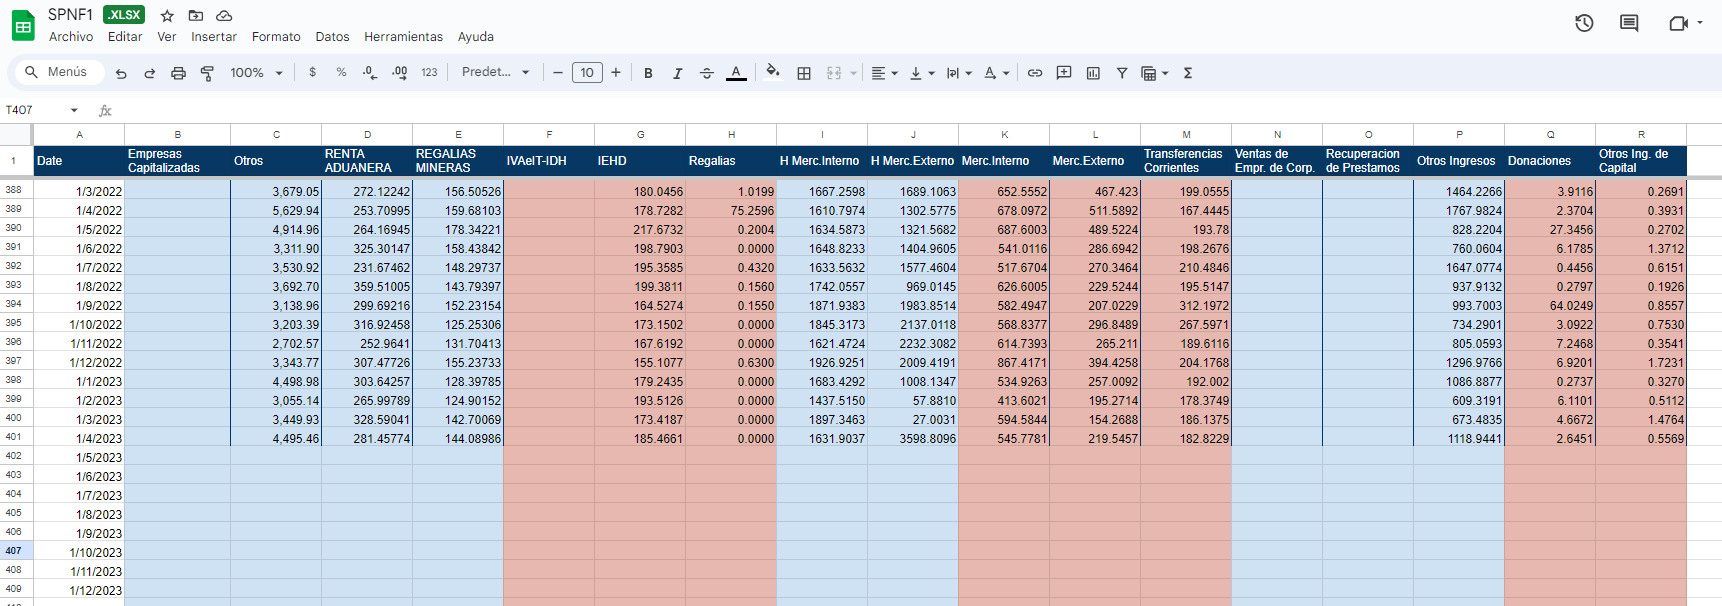

*   La analista del sector solo debe verificar que la información este cargada en las columnas respectivas:

| Empresas Capitalizadas | Otros | RENTA ADUANERA | REGALIAS MINERAS | IVAeIT-IDH | IEHD | Regalias | H Merc.Interno | H Merc.Externo | Merc.Interno | Merc.Externo | Transferencias Corrientes | Ventas de Empr. de Corp. | Recuperacion de Prestamos | Otros Ingresos | Donaciones | Otros Ing. de Capital |
|------------------------|-------|----------------|------------------|------------|------|----------|----------------|----------------|--------------|--------------|---------------------------|--------------------------|---------------------------|----------------|------------|-----------------------|

*   Puede editar desde cualquier fecha que requiera el analista (según informo suele editar desde cada enero de la gestión en curso)
*   Los datos deben tener como 4 decimales dado que drive trabaja el dato como lo ve.
*   De aqui en adelante el codígo realizara una serie de transformaciones y se ira vizualizando en un html la base de datos danto por mes como acumulada
*   Se ira añadiendo mas pasos.....


In [ ]:
from google.colab import drive
import pandas as pd
import warnings
# Desactivar todas las advertencias
warnings.filterwarnings("ignore")
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Sector Fiscal/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Sector Fiscal


In [ ]:
#cargando la base de datos para Ingresos
Ingresos = pd.read_excel('SPNF.xlsx', sheet_name='Ingresos', index_col=0)
Ingresos_df = Ingresos.dropna(how='all')
#Creando la Variable Renta Interna
Ingresos_df.insert(0, 'Renta Interna', Ingresos_df['Empresas Capitalizadas'].fillna(0) + Ingresos_df['Otros'].fillna(0))
#Creando la Variable Ingresos Tributarios
Ingresos_df.insert(0, 'Ingresos Tributarios', Ingresos_df['Renta Interna'].fillna(0) + Ingresos_df['RENTA ADUANERA'].fillna(0) + Ingresos_df['REGALIAS MINERAS'].fillna(0))
#Creando la Variable Impuestos S/Hidrocarburos
Ingresos_df.insert(0, 'Impuestos S/Hidrocarburos', Ingresos_df['IVAeIT-IDH'].fillna(0) + Ingresos_df['IEHD'].fillna(0) + Ingresos_df['Regalias'].fillna(0))
#Creando la Variable Hidrocarburos
Ingresos_df.insert(0, 'HIDROCARBUROS', Ingresos_df['H Merc.Interno'].fillna(0) + Ingresos_df['H Merc.Externo'].fillna(0))
#Creando la Variable Otros Empresas
Ingresos_df.insert(0, 'OTRAS EMPRESAS', Ingresos_df['Merc.Interno'].fillna(0) + Ingresos_df['Merc.Externo'].fillna(0))
#Creando la Variable Otros ingresos Corrientes
Ingresos_df.insert(0, 'OTROS INGRESOS CORRIENTES', Ingresos_df['Ventas de Empr. de Corp.'].fillna(0) + Ingresos_df['Recuperacion de Prestamos'].fillna(0)+ Ingresos_df['Otros Ingresos'].fillna(0))
#Creando la Variable Ingresos de Capital
Ingresos_df.insert(0, 'INGRESOS DE CAPITAL', Ingresos_df['Donaciones'].fillna(0) + Ingresos_df['Otros Ing. de Capital'].fillna(0))
#Creando la Variable Ingresos Corrientes
Ingresos_df.insert(0, 'INGRESOS CORRIENTES', Ingresos_df['Ingresos Tributarios'].fillna(0) + Ingresos_df['Impuestos S/Hidrocarburos'].fillna(0)+ Ingresos_df['HIDROCARBUROS'].fillna(0)+ Ingresos_df['OTRAS EMPRESAS'].fillna(0)+ Ingresos_df['Transferencias Corrientes'].fillna(0)+ Ingresos_df['OTROS INGRESOS CORRIENTES'].fillna(0))
#Creando la Variable Ingresos Totales
Ingresos_df.insert(0, 'INGRESOS TOTALES', Ingresos_df['INGRESOS CORRIENTES'].fillna(0) + Ingresos_df['INGRESOS DE CAPITAL'].fillna(0))
#redondeando a 2 decimales
Ingresos_df1=Ingresos_df.round(4)
#ordenando al esquema de la analista del sector
ordenar_columnas = ['INGRESOS TOTALES', 'INGRESOS CORRIENTES', 'Ingresos Tributarios', 'Renta Interna', 'Empresas Capitalizadas', 'Otros', 'RENTA ADUANERA', 'REGALIAS MINERAS','Impuestos S/Hidrocarburos', 'IVAeIT-IDH', 'IEHD', 'Regalias', 'HIDROCARBUROS', 'H Merc.Interno', 'H Merc.Externo', 'OTRAS EMPRESAS', 'Merc.Interno', 'Merc.Externo', 'Transferencias Corrientes', 'OTROS INGRESOS CORRIENTES', 'Ventas de Empr. de Corp.', 'Recuperacion de Prestamos','Otros Ingresos', 'INGRESOS DE CAPITAL', 'Donaciones', 'Otros Ing. de Capital']
Ingresos_df1= Ingresos_df1[ordenar_columnas]
Ingresos_df1

,INGRESOS TOTALES,INGRESOS CORRIENTES,Ingresos Tributarios,Renta Interna,Empresas Capitalizadas,Otros,RENTA ADUANERA,REGALIAS MINERAS,Impuestos S/Hidrocarburos,IVAeIT-IDH,...,Merc.Interno,Merc.Externo,Transferencias Corrientes,OTROS INGRESOS CORRIENTES,Ventas de Empr. de Corp.,Recuperacion de Prestamos,Otros Ingresos,INGRESOS DE CAPITAL,Donaciones,Otros Ing. de Capital
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,361.5865,346.0551,83.2395,66.7595,0.0,66.7595,15.7471,0.7329,0.0000,0.0,...,39.5017,33.5480,9.4246,32.3320,18.2990,0.0,14.0330,15.5313,13.7641,1.7672
1990-02-01,309.3863,286.9427,69.8897,51.9897,0.0,51.9897,16.9582,0.9418,0.0000,0.0,...,34.8836,21.5928,5.0044,28.1101,12.9155,0.0,15.1946,22.4436,21.2729,1.1707
1990-03-01,381.8839,330.1667,78.0090,59.5206,0.0,59.5206,17.4395,1.0490,0.0000,0.0,...,39.3736,36.3284,8.5280,34.4993,16.5076,0.0,17.9917,51.7172,49.3705,2.3467
1990-04-01,360.1671,351.0654,96.5247,78.5310,0.0,78.5310,16.3169,1.6768,0.0000,0.0,...,40.3191,21.1601,7.3942,36.6045,15.5930,0.0,21.0115,9.1016,8.1321,0.9695
1990-05-01,424.2628,417.4090,131.6360,112.9183,0.0,112.9183,16.1808,2.5369,0.0000,0.0,...,45.4970,44.3414,10.3175,37.2869,18.8230,0.0,18.4639,6.8538,5.5651,1.2886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,10670.2041,10661.5609,3806.4826,3343.7681,NaN,3343.7681,307.4773,155.2373,155.7377,NaN,...,867.4171,394.4258,204.1768,1296.9766,NaN,NaN,1296.9766,8.6433,6.9201,1.7231
2023-01-01,9873.2537,9872.6530,4931.0204,4498.9800,NaN,4498.9800,303.6426,128.3978,179.2435,NaN,...,534.9263,257.0092,192.0020,1086.8877,NaN,NaN,1086.8877,0.6006,0.2737,0.3270
2023-02-01,6538.1357,6531.5144,3446.0383,3055.1389,NaN,3055.1389,265.9979,124.9015,193.5126,NaN,...,413.6021,195.2714,178.3749,609.3191,NaN,NaN,609.3191,6.6213,6.1101,0.5112


In [ ]:
#cargando la base de datos de Egresos
Egresos = pd.read_excel('SPNF.xlsx', sheet_name='Egresos', index_col=0)
Egresos_df = Egresos.dropna(how='all')
#Creando la Variable Servicios Personales
Egresos_df.insert(0, 'SERVICIOS PERSONALES', Egresos_df['Indemnizaciones'].fillna(0) + Egresos_df['Beneméritos'].fillna(0)+ Egresos_df['Resto de Remuneraciones'].fillna(0))
#Creando la Variable Bienes y Servicios
Egresos_df.insert(4, 'BIENES Y SERVICIOS', Egresos_df['Contratistas'].fillna(0) + Egresos_df['Otros'].fillna(0))
#Creando la Variable Intereses de deuda externa
Egresos_df.insert(8, 'INTERESES DEUDA INTERNA', Egresos_df['Pérdidas BCB'].fillna(0) + Egresos_df['Otros.1'].fillna(0))
#Creando la Variable Transferencias Corrientes
Egresos_df.insert(11, 'TRANSFERENCIAS CORRIENTES', Egresos_df['Emisión de Cert. Fiscales'].fillna(0) + Egresos_df['Rentistas'].fillna(0)+ Egresos_df['Ots.Transf. al S.Privado'].fillna(0))
#Creando la Variable Otros Egresos Corrientes
Egresos_df.insert(15, 'OTROS EGRESOS CORRIENTES', Egresos_df['Universidades'].fillna(0) + Egresos_df['Créd.de Ajuste Estruct.(SAC)'].fillna(0)+ Egresos_df['Concesion de Prestamos'].fillna(0)+ Egresos_df['DIFEM'].fillna(0)+ Egresos_df['Otros.2'].fillna(0))
#Creando la Variable Ingresos Corrientes
Egresos_df.insert(22, 'Ingresos Corrientes', Egresos_df['Aportes Privados'].fillna(0))
#Creando la Variable Gastos Corrientes
Egresos_df.insert(24, 'Gastos Corrientes', Egresos_df['Rentas Pensiones'].fillna(0)+Egresos_df['Ap.Fusion Salarios'].fillna(0))
#Creando la Variable Pensiones
Egresos_df.insert(22, 'PENSIONES', Egresos_df['Ingresos Corrientes'].fillna(0) - Egresos_df['Gastos Corrientes'].fillna(0))
#Creando la Variable Egresos Corrientes
Egresos_df.insert(0, 'EGRESOS CORRIENTES', Egresos_df['SERVICIOS PERSONALES'].fillna(0) + Egresos_df['BIENES Y SERVICIOS'].fillna(0)+ Egresos_df['INTERESES DEUDA EXTERNA'].fillna(0)+ Egresos_df['INTERESES DEUDA INTERNA'].fillna(0)+ Egresos_df['TRANSFERENCIAS CORRIENTES'].fillna(0)+ Egresos_df['OTROS EGRESOS CORRIENTES'].fillna(0)+ Egresos_df['GASTOS NO IDENTIFICADOS'].fillna(0)- Egresos_df['PENSIONES'].fillna(0))
#Creando la Variable Egresos Totales
Egresos_df.insert(0, 'EGRESOS TOTALES', Egresos_df['EGRESOS CORRIENTES'].fillna(0) + Egresos_df['EGRESOS DE CAPITAL'].fillna(0))
#redondeando a 2 decimales
Egresos_df1=Egresos_df.round(4)
#En este caso al poner en la pocisión exacta las variable no fue necesario ordenar
Egresos_df1

,EGRESOS TOTALES,EGRESOS CORRIENTES,SERVICIOS PERSONALES,Indemnizaciones,Beneméritos,Resto de Remuneraciones,BIENES Y SERVICIOS,Contratistas,Otros,INTERESES DEUDA EXTERNA,...,DIFEM,Otros.2,GASTOS NO IDENTIFICADOS,PENSIONES,Ingresos Corrientes,Aportes Privados,Gastos Corrientes,Rentas Pensiones,Ap.Fusion Salarios,EGRESOS DE CAPITAL
date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,310.5548,249.8068,95.2455,4.4513,5.8017,84.9924,98.1221,11.7908,86.3313,12.0832,...,0.0,17.9428,-0.9408,0.0000,0.0,0.0,0.0000,0.0000,0.0,60.7480
1990-02-01,362.6099,291.1519,98.9427,4.7561,12.0785,82.1081,82.7309,11.5289,71.2020,27.0325,...,0.0,18.0251,27.5352,0.0000,0.0,0.0,0.0000,0.0000,0.0,71.4580
1990-03-01,407.5684,322.2645,101.3163,3.4968,0.0851,97.7345,109.2738,11.9606,97.3132,41.9813,...,0.0,27.0983,-3.6269,0.0000,0.0,0.0,0.0000,0.0000,0.0,85.3038
1990-04-01,328.8709,269.9043,113.3301,3.3545,6.1335,103.8421,104.4501,13.1344,91.3157,25.7577,...,0.0,27.8210,-34.8778,0.0000,0.0,0.0,0.0000,0.0000,0.0,58.9665
1990-05-01,499.1285,428.4413,126.9478,3.5490,6.0691,117.3297,132.9381,11.7489,121.1892,52.4700,...,0.0,29.8888,44.4749,0.0000,0.0,0.0,0.0000,0.0000,0.0,70.6872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,22072.4827,17582.0954,6360.1284,30.5876,4.0302,6325.5105,9351.5439,NaN,9351.5439,139.3654,...,NaN,237.0566,-760.7269,-1146.0211,0.0,NaN,1146.0211,1146.0211,0.0,4490.3873
2023-01-01,7452.4668,6729.9180,2870.9466,58.5447,4.1068,2808.2951,1760.6071,NaN,1760.6071,290.9264,...,NaN,148.5798,-339.1476,-1161.3075,0.0,NaN,1161.3075,1161.3075,0.0,722.5488
2023-02-01,8197.2497,7375.2722,2928.7232,23.4013,3.9383,2901.3835,2281.1515,NaN,2281.1515,280.6537,...,NaN,145.7115,308.8232,-589.8173,0.0,NaN,589.8173,589.8173,0.0,821.9774


In [ ]:
#Cargando la base de datos para financiamiento
Financiamiento = pd.read_excel('SPNF.xlsx', sheet_name='Financiamiento', index_col=0)
Financiamiento_df = Financiamiento.dropna(how='all')
#Creando la variable Credito externo neto
Financiamiento_df.insert(0, 'CREDITO EXTERNO NETO', Financiamiento_df['DESEMBOLSOS'].fillna(0) + Financiamiento_df['DESEMBOLSO POR LINEAS DE DESARROLLO'].fillna(0)+ Financiamiento_df['AMORTIZACIONES'].fillna(0)+ Financiamiento_df['INTERESES NO PAGADOS'].fillna(0)+ Financiamiento_df['PAGO MORA'].fillna(0)+ Financiamiento_df['ATRASOS ARGENTINA'].fillna(0)+ Financiamiento_df['Alivio Deuda Ext. Hipc'].fillna(0)+ Financiamiento_df['OTROS (DEP. ENTEL)'].fillna(0))
#Creando la variable Banco Central
Financiamiento_df.insert(10, 'BANCO CENTRAL', Financiamiento_df['Cuasifiscal'].fillna(0) + Financiamiento_df['Resto'].fillna(0))
#Creando la variable OTROS
Financiamiento_df.insert(15, 'OTROS', Financiamiento_df['Certificados Fiscales'].fillna(0) + Financiamiento_df['Depositos no Corrientes'].fillna(0)+ Financiamiento_df["Lt's, Mutuales y BT's."].fillna(0)+ Financiamiento_df["Bonos AFP's"].fillna(0)+ Financiamiento_df['Otros'].fillna(0))
#Creando variable OTRO TIPO DE FINANCIAMIENTO
Financiamiento_df.insert(10, 'CREDITO INTERNO NETO', Financiamiento_df['BANCO CENTRAL'].fillna(0) + Financiamiento_df['CONTRATISTAS'].fillna(0)+ Financiamiento_df['DEUDA FLOTANTE'].fillna(0)+ Financiamiento_df['OTROS'].fillna(0))
#Creando variable otro tipo de financiamiento
Financiamiento_df.insert(22, 'OTRO TIPO DE FINANCIAMIENTO', Financiamiento_df['Otros por clasificar 1/'].fillna(0))
#Creando variable financiamiento
Financiamiento_df.insert(0, 'FINANCIAMIENTO', Financiamiento_df['CREDITO EXTERNO NETO'].fillna(0) + Financiamiento_df['CREDITO INTERNO NETO'].fillna(0)+ Financiamiento_df['OTRO TIPO DE FINANCIAMIENTO'].fillna(0))
#redondeando a 2 decimales
Financiamiento_df1=Financiamiento_df.round(2)
Financiamiento_df1.head(-10)

,FINANCIAMIENTO,CREDITO EXTERNO NETO,DESEMBOLSOS,Bonos Soberanos,DESEMBOLSO POR LINEAS DE DESARROLLO,AMORTIZACIONES,INTERESES NO PAGADOS,PAGO MORA,ATRASOS ARGENTINA,Alivio Deuda Ext. Hipc,...,CONTRATISTAS,DEUDA FLOTANTE,OTROS,Certificados Fiscales,Depositos no Corrientes,"Lt's, Mutuales y BT's.",Bonos AFP's,Otros,OTRO TIPO DE FINANCIAMIENTO,Otros por clasificar 1/
date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,-51.03,-97.73,20.99,NaN,0.0,-5.72,5.72,-0.64,-47.38,-70.70,...,11.79,0.48,-0.36,0.41,-9.87,0.0,NaN,9.10,0.0,NaN
1990-02-01,53.22,7.95,15.90,NaN,0.0,-10.18,15.58,-1.27,1.91,-13.99,...,1.57,0.47,-7.06,-4.58,-2.88,0.0,NaN,0.40,0.0,NaN
1990-03-01,25.68,32.44,38.16,NaN,0.0,-20.67,16.54,-2.54,0.95,0.00,...,11.95,0.47,30.82,1.70,30.42,0.0,NaN,-1.30,0.0,NaN
1990-04-01,-31.30,10.00,9.22,NaN,0.0,-22.90,8.27,-1.27,36.89,-20.21,...,-5.20,2.36,-16.47,-4.73,-4.84,0.0,NaN,-6.90,0.0,NaN
1990-05-01,74.87,35.93,26.08,NaN,0.0,-19.40,30.21,0.00,3.50,-4.45,...,2.43,4.68,3.28,-9.00,1.28,0.0,NaN,11.00,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,668.13,-223.00,165.99,NaN,NaN,-388.99,NaN,NaN,NaN,NaN,...,NaN,-298.70,714.36,-70.91,6.52,1100.0,-190.11,-131.15,0.0,0.0
2022-03-01,-763.88,575.05,6132.92,NaN,NaN,-5557.87,NaN,NaN,NaN,NaN,...,NaN,-614.79,949.13,-35.63,-15.02,1080.0,-178.33,98.12,0.0,0.0
2022-04-01,-927.92,101.90,346.75,NaN,NaN,-244.86,NaN,NaN,NaN,NaN,...,NaN,227.28,1276.02,-91.96,0.98,1300.0,-178.44,245.44,0.0,0.0


In [ ]:
IyE = pd.merge(Ingresos_df1, Egresos_df1, left_index=True, right_index=True, how='inner')
IyE['SUP (DEF) CORRIENTE']=IyE['INGRESOS CORRIENTES'].fillna(0)-IyE['EGRESOS CORRIENTES'].fillna(0)
IyE['SUP (DEF) PRIMARIO']=IyE['INGRESOS TOTALES'].fillna(0)-(IyE['EGRESOS TOTALES'].fillna(0)-IyE['INTERESES DEUDA EXTERNA'].fillna(0)-IyE['INTERESES DEUDA INTERNA'].fillna(0))
IyE['SUP (DEF) SIN PENSIONES']=IyE['INGRESOS TOTALES'].fillna(0)-(IyE['EGRESOS TOTALES'].fillna(0)+IyE['PENSIONES'].fillna(0))
IyE['SUP (DEF) GLOBAL']=IyE['INGRESOS TOTALES'].fillna(0)-IyE['EGRESOS TOTALES'].fillna(0)
DF_IyE=IyE
SPNF_cd=pd.merge(DF_IyE, Financiamiento_df1, left_index=True, right_index=True, how='inner')
SPNF_cd.head(5)
# Ahora, puedes imprimir los nombres de las columnas


,INGRESOS TOTALES,INGRESOS CORRIENTES,Ingresos Tributarios,Renta Interna,Empresas Capitalizadas,Otros_x,RENTA ADUANERA,REGALIAS MINERAS,Impuestos S/Hidrocarburos,IVAeIT-IDH,...,CONTRATISTAS,DEUDA FLOTANTE,OTROS,Certificados Fiscales,Depositos no Corrientes,"Lt's, Mutuales y BT's.",Bonos AFP's,Otros,OTRO TIPO DE FINANCIAMIENTO,Otros por clasificar 1/
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,361.5865,346.0551,83.2395,66.7595,0.0,66.7595,15.7471,0.7329,0.0,0.0,...,11.79,0.48,-0.36,0.41,-9.87,0.0,NaN,9.1,0.0,NaN
1990-02-01,309.3863,286.9427,69.8897,51.9897,0.0,51.9897,16.9582,0.9418,0.0,0.0,...,1.57,0.47,-7.06,-4.58,-2.88,0.0,NaN,0.4,0.0,NaN
1990-03-01,381.8839,330.1667,78.0090,59.5206,0.0,59.5206,17.4395,1.0490,0.0,0.0,...,11.95,0.47,30.82,1.70,30.42,0.0,NaN,-1.3,0.0,NaN
1990-04-01,360.1671,351.0654,96.5247,78.5310,0.0,78.5310,16.3169,1.6768,0.0,0.0,...,-5.20,2.36,-16.47,-4.73,-4.84,0.0,NaN,-6.9,0.0,NaN
1990-05-01,424.2628,417.4090,131.6360,112.9183,0.0,112.9183,16.1808,2.5369,0.0,0.0,...,2.43,4.68,3.28,-9.00,1.28,0.0,NaN,11.0,0.0,NaN


### Resumen SPNF sin acumular

En este data frame se presentara un resumen del SPNF resumido, para lo cual se deben seleccionar variables de la base de ingresos y egresos, asi tambien agregar y crear nuevas variables. Al final se unira ambas bases y se generara un archivo conjunto la cual es el SPNF.

In [ ]:
#Este es el SPNF resumido Aqui igual se hacen calculos para corroborar que este bien hecho
SPNF_resu=SPNF_cd[['INGRESOS TOTALES', 'INGRESOS CORRIENTES', 'Renta Interna', 'RENTA ADUANERA', 'Impuestos S/Hidrocarburos', 'HIDROCARBUROS', 'INGRESOS DE CAPITAL']]
SPNF_resu.insert(2, 'Ingresos Tributarios', SPNF_cd['Renta Interna'].fillna(0) + SPNF_cd['RENTA ADUANERA'].fillna(0))
SPNF_resu.insert(7, 'Otros Ingresos Corrientes', SPNF_cd['REGALIAS MINERAS'].fillna(0) + SPNF_cd['OTRAS EMPRESAS'].fillna(0)+ SPNF_cd['Transferencias Corrientes'].fillna(0)+ SPNF_cd['OTROS INGRESOS CORRIENTES'].fillna(0))
SPNF_resu['Servicios Personales']=SPNF_cd['SERVICIOS PERSONALES'].fillna(0)
SPNF_resu['Bienes y Servicios']=SPNF_cd['BIENES Y SERVICIOS'].fillna(0)
SPNF_resu['Intereses de Deuda']=SPNF_cd['INTERESES DEUDA EXTERNA'].fillna(0)+SPNF_cd['INTERESES DEUDA INTERNA'].fillna(0)
SPNF_resu['Pensiones']=SPNF_cd['Gastos Corrientes'].fillna(0)
SPNF_resu['Otros Egresos Corrientes']=SPNF_cd['TRANSFERENCIAS CORRIENTES'].fillna(0)+SPNF_cd['OTROS EGRESOS CORRIENTES'].fillna(0)+SPNF_cd['GASTOS NO IDENTIFICADOS'].fillna(0)
SPNF_resu['Gastos de Capital']=SPNF_cd['EGRESOS DE CAPITAL'].fillna(0)
SPNF_resu.insert(9, 'Gastos Corrientes', SPNF_resu['Servicios Personales'].fillna(0)+SPNF_resu['Bienes y Servicios'].fillna(0)+SPNF_resu['Intereses de Deuda'].fillna(0)+SPNF_resu['Pensiones'].fillna(0)+SPNF_resu['Otros Egresos Corrientes'].fillna(0))
SPNF_resu.insert(9, 'Gastos Totales', SPNF_resu['Gastos Corrientes'].fillna(0)+SPNF_resu['Gastos de Capital'].fillna(0))
SPNF_resu['Supéravit / Déficit Corriente']=SPNF_resu['INGRESOS CORRIENTES'].fillna(0)-SPNF_resu['Gastos Corrientes'].fillna(0)
SPNF_resu['Supéravit / Déficit Primario']=SPNF_resu['INGRESOS TOTALES'].fillna(0)-(SPNF_resu['Gastos Totales'].fillna(0)-SPNF_resu['Intereses de Deuda'].fillna(0))
SPNF_resu['Supéravit / Déficit Sin Pensiones']=SPNF_resu['INGRESOS TOTALES'].fillna(0)-(SPNF_resu['Gastos Totales'].fillna(0)-SPNF_resu['Pensiones'].fillna(0))
SPNF_resu['Supéravit / Déficit Global']=SPNF_resu['INGRESOS TOTALES'].fillna(0)-SPNF_resu['Gastos Totales'].fillna(0)
SPNF_resu

,INGRESOS TOTALES,INGRESOS CORRIENTES,Ingresos Tributarios,Renta Interna,RENTA ADUANERA,Impuestos S/Hidrocarburos,HIDROCARBUROS,Otros Ingresos Corrientes,INGRESOS DE CAPITAL,Gastos Totales,...,Servicios Personales,Bienes y Servicios,Intereses de Deuda,Pensiones,Otros Egresos Corrientes,Gastos de Capital,Supéravit / Déficit Corriente,Supéravit / Déficit Primario,Supéravit / Déficit Sin Pensiones,Supéravit / Déficit Global
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,361.5865,346.0551,82.5066,66.7595,15.7471,0.0000,148.0093,115.5392,15.5313,310.5549,...,95.2455,98.1221,13.7545,0.0000,42.6848,60.7480,96.2482,64.7861,51.0316,51.0316
1990-02-01,309.3863,286.9427,68.9479,51.9897,16.9582,0.0000,127.4620,90.5328,22.4436,362.6099,...,98.9427,82.7309,41.9568,0.0000,67.5215,71.4580,-4.2092,-11.2668,-53.2236,-53.2236
1990-03-01,381.8839,330.1667,76.9601,59.5206,17.4395,0.0000,133.4284,119.7784,51.7172,407.5683,...,101.3163,109.2738,53.3585,0.0000,58.3159,85.3038,7.9022,27.6741,-25.6844,-25.6844
1990-04-01,360.1671,351.0654,94.8479,78.5310,16.3169,0.0000,149.0628,107.1547,9.1016,328.8709,...,113.3301,104.4501,32.4077,0.0000,19.7165,58.9665,81.1610,63.7039,31.2962,31.2962
1990-05-01,424.2628,417.4090,129.0991,112.9183,16.1808,0.0000,148.3301,139.9797,6.8538,499.1285,...,126.9478,132.9381,68.1776,0.0000,100.3778,70.6872,-11.0323,-6.6881,-74.8657,-74.8657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,10670.2041,10661.5609,3651.2454,3343.7681,307.4773,155.7377,3936.3442,2918.2336,8.6433,22072.4827,...,6360.1284,9351.5439,253.5736,1146.0211,470.8284,4490.3873,-6920.5345,-11148.7050,-10256.2575,-11402.2786
2023-01-01,9873.2537,9872.6530,4802.6226,4498.9800,303.6426,179.2435,2691.5639,2199.2230,0.6006,7452.4667,...,2870.9466,1760.6071,462.1611,1161.3075,474.8956,722.5488,3142.7351,2882.9481,3582.0945,2420.7870
2023-02-01,6538.1357,6531.5144,3321.1368,3055.1389,265.9979,193.5126,1495.3960,1521.4690,6.6213,8197.2498,...,2928.7232,2281.1515,395.3789,589.8173,1180.2015,821.9774,-843.7580,-1263.7352,-1069.2968,-1659.1141


# SPNF Acumulativo

In [ ]:
#Hay que ir acumulando año a año, es decir enero+febrero+marzo+abril+mayo+junio+julio+agosto+septiembre+octubre
# Calcular la suma acumulativa por columnas
#======================================================================================================================
#                                                 Ingresos
#======================================================================================================================
# Utilizar ffill() para rellenar los NaN con la última suma válida
#Ingresos_acumulativo = Ingresos_acumu.fillna(method='ffill')
Ingresos_acumulativo = Ingresos_df.groupby(Ingresos_df.index.year).cumsum()
Ingresos_acumulativo = Ingresos_acumulativo.fillna(method='ffill')
#======================================================================================================================
#                                                 Egresos
#======================================================================================================================
Egresos_acumulativo = Egresos_df.groupby(Egresos_df.index.year).cumsum()
Egresos_acumulativo = Egresos_acumulativo.fillna(method='ffill')
#======================================================================================================================
#                                             FINANCIAMIENTO
#======================================================================================================================
Financiamiento_acumulativo = Financiamiento_df.groupby(Financiamiento_df.index.year).cumsum()
Financiamiento_acumulativo = Financiamiento_acumulativo.fillna(method='ffill')
#======================================================================================================================
#                                          SPNF GENERAL ACUMULADO
#======================================================================================================================
SPNF_acum=SPNF_cd.groupby(SPNF_cd.index.year).cumsum()
SPNF_acum=SPNF_acum.fillna(method='ffill')
SPNF_acumulativo=SPNF_acum.round(2)
#======================================================================================================================
#                                          SPNF Resumido ACUMULADO
#======================================================================================================================
SPNF_resu1=SPNF_resu
SPNF_resu1.insert(5, 'Ingresos por Hidrocarburos', SPNF_resu['Impuestos S/Hidrocarburos'].fillna(0)+SPNF_resu['HIDROCARBUROS'].fillna(0))
SPNF_resu1 = SPNF_resu1.drop(['Impuestos S/Hidrocarburos', 'HIDROCARBUROS'], axis=1)
SPNFr_acum=SPNF_resu1.groupby(SPNF_resu1.index.year).cumsum()
SPNFr_acum=SPNFr_acum.fillna(method='ffill')
SPNFr_acumulativo=SPNFr_acum.round(2)
SPNFr_acumulativo
# Mostrar el DataFrame con la suma acumulativa y NaN reemplazados

,INGRESOS TOTALES,INGRESOS CORRIENTES,Ingresos Tributarios,Renta Interna,RENTA ADUANERA,Ingresos por Hidrocarburos,Otros Ingresos Corrientes,INGRESOS DE CAPITAL,Gastos Totales,Gastos Corrientes,Servicios Personales,Bienes y Servicios,Intereses de Deuda,Pensiones,Otros Egresos Corrientes,Gastos de Capital,Supéravit / Déficit Corriente,Supéravit / Déficit Primario,Supéravit / Déficit Sin Pensiones,Supéravit / Déficit Global
Date,,,,,,,,,,,,,,,,,,,,
1990-01-01,361.59,346.06,82.51,66.76,15.75,148.01,115.54,15.53,310.55,249.81,95.25,98.12,13.75,0.00,42.68,60.75,96.25,64.79,51.03,51.03
1990-02-01,670.97,633.00,151.45,118.75,32.71,275.47,206.07,37.97,673.16,540.96,194.19,180.85,55.71,0.00,110.21,132.21,92.04,53.52,-2.19,-2.19
1990-03-01,1052.86,963.16,228.41,178.27,50.14,408.90,325.85,89.69,1080.73,863.22,295.50,290.13,109.07,0.00,168.52,217.51,99.94,81.19,-27.88,-27.88
1990-04-01,1413.02,1314.23,323.26,256.80,66.46,557.96,433.01,98.79,1409.60,1133.13,408.83,394.58,141.48,0.00,188.24,276.48,181.10,144.90,3.42,3.42
1990-05-01,1837.29,1731.64,452.36,369.72,82.64,706.29,572.98,105.65,1908.73,1561.57,535.78,527.52,209.66,0.00,288.62,347.16,170.07,138.21,-71.45,-71.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,117727.54,117588.89,47690.71,44326.99,3363.72,41315.67,28582.52,138.65,139301.60,118344.34,41128.15,56122.13,4592.69,7597.31,8904.06,20957.26,-755.45,-16981.37,-13976.74,-21574.06
2023-01-01,9873.25,9872.65,4802.62,4498.98,303.64,2870.81,2199.22,0.60,7452.47,6729.92,2870.95,1760.61,462.16,1161.31,474.90,722.55,3142.74,2882.95,3582.09,2420.79
2023-02-01,16411.39,16404.17,8123.76,7554.12,569.64,4559.72,3720.69,7.22,15649.72,14105.19,5799.67,4041.76,857.54,1751.12,1655.10,1544.53,2298.98,1619.21,2512.80,761.67


#### Crecimiento interanual (12 meses) de las series mensuales del SPNF general y resumido

In [ ]:
# Calcular el crecimiento interanual del SPNF general
g_SPNF_cd = SPNF_cd.pct_change(periods=12) * 100
g_SPNF=g_SPNF_cd.round(1)
# Calcular el crecimiento interanual del SPNF resumido
g_SPNF_resu = SPNF_resu.pct_change(periods=12) * 100
g_SPNFr=g_SPNF_resu.round(1)

#### Crecimiento interanual (12 meses) de las series acumuladas del SPNF general y resumido


In [ ]:
# Calcular el crecimiento interanual del SPNF general acumulado
g_SPNF_acum = SPNF_acum.pct_change(periods=12) * 100
g_SPNF_acum=g_SPNF_acum.round(1)
# Calcular el crecimiento interanual del SPNF resumido acumulado
g_SPNFr_acum = SPNFr_acum.pct_change(periods=12) * 100
g_SPNFr_acum=g_SPNFr_acum.round(1)

### SPNF Resumido (mensual y acumulado) como porcentaje del PIB

Aqui el analista debera tener a dispoción en su mismo archivo el PIB por año que el analista del sector real Provee.

In [ ]:
import pandas as pd

# Se cargara el PIB anual y se repetira el valor para cada mes
df_PIB_n = pd.read_excel('PIB_anu.xlsx', sheet_name='PIB_n_millo', index_col=0)
df_PIB_n = df_PIB_n.dropna(how='all')
meses = list(range(1, 13))
df_mensual = pd.DataFrame()

for año, valor_anual in df_PIB_n['PIB nominal'].items():
    for mes in meses:
        df_mensual = df_mensual.append({'Año': año, 'Mes': mes, 'PIB nominal': valor_anual}, ignore_index=True)

# Establecer el tipo de datos de las columnas 'Año' y 'Mes' como enteros
df_mensual['Año'] = df_mensual['Año'].astype(int)
df_mensual['Mes'] = df_mensual['Mes'].astype(int)
# Crear una nueva columna 'Date' con el formato "aaaa-mm-dd"
df_mensual['Date'] = df_mensual['Año'].astype(str) + '-' + df_mensual['Mes'].astype(str).str.zfill(2) + '-01'

# Asegurarse de que la columna 'date' sea de tipo datetime
df_mensual['Date'] = pd.to_datetime(df_mensual['Date'])
df_mensual=df_mensual.drop(['Año', 'Mes'], axis=1)
df_mensual=df_mensual.set_index('Date')
#========================================================
#Se hace un match para la base del SPNF y PIB segun la fecha
#========================================================
SPNFr_PIB_t = pd.merge(SPNF_resu, df_mensual, left_index=True, right_index=True, how='inner')
SPNFr_PIB_acum_t = pd.merge(SPNFr_acum, df_mensual, left_index=True, right_index=True, how='inner')
#====
SPNFr_PIB=pd.DataFrame()
variables_SPNFr = SPNF_resu.columns.tolist()
for var in variables_SPNFr:
    #Variables como porcentaje del PIB
    V_pib = f'{var}'
    SPNFr_PIB[V_pib] = SPNFr_PIB_t[var] / SPNFr_PIB_t['PIB nominal'] * 100
SPNFr_PIB_acum=pd.DataFrame()
variables_SPNFr_a = SPNFr_acum.columns.tolist()
for var in variables_SPNFr_a:
    #Variables como porcentaje del PIB
    V_pib = f'{var}'
    SPNFr_PIB_acum[V_pib] = SPNFr_PIB_acum_t[var] / SPNFr_PIB_acum_t['PIB nominal'] * 100

SPNFr_PIB_acum=SPNFr_PIB_acum.round(1)
SPNFr_PIB_acum

,INGRESOS TOTALES,INGRESOS CORRIENTES,Ingresos Tributarios,Renta Interna,RENTA ADUANERA,Ingresos por Hidrocarburos,Otros Ingresos Corrientes,INGRESOS DE CAPITAL,Gastos Totales,Gastos Corrientes,Servicios Personales,Bienes y Servicios,Intereses de Deuda,Pensiones,Otros Egresos Corrientes,Gastos de Capital,Supéravit / Déficit Corriente,Supéravit / Déficit Primario,Supéravit / Déficit Sin Pensiones,Supéravit / Déficit Global
Date,,,,,,,,,,,,,,,,,,,,
1990-01-01,2.3,2.2,0.5,0.4,0.1,1.0,0.7,0.1,2.0,1.6,0.6,0.6,0.1,0.0,0.3,0.4,0.6,0.4,0.3,0.3
1990-02-01,4.3,4.1,1.0,0.8,0.2,1.8,1.3,0.2,4.4,3.5,1.3,1.2,0.4,0.0,0.7,0.9,0.6,0.3,-0.0,-0.0
1990-03-01,6.8,6.2,1.5,1.2,0.3,2.6,2.1,0.6,7.0,5.6,1.9,1.9,0.7,0.0,1.1,1.4,0.6,0.5,-0.2,-0.2
1990-04-01,9.1,8.5,2.1,1.7,0.4,3.6,2.8,0.6,9.1,7.3,2.6,2.6,0.9,0.0,1.2,1.8,1.2,0.9,0.0,0.0
1990-05-01,11.9,11.2,2.9,2.4,0.5,4.6,3.7,0.7,12.4,10.1,3.5,3.4,1.4,0.0,1.9,2.2,1.1,0.9,-0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,38.7,38.7,15.7,14.6,1.1,13.6,9.4,0.0,45.8,38.9,13.5,18.5,1.5,2.5,2.9,6.9,-0.2,-5.6,-4.6,-7.1
2023-01-01,3.2,3.2,1.5,1.4,0.1,0.9,0.7,0.0,2.4,2.1,0.9,0.6,0.1,0.4,0.2,0.2,1.0,0.9,1.1,0.8
2023-02-01,5.2,5.2,2.6,2.4,0.2,1.5,1.2,0.0,5.0,4.5,1.9,1.3,0.3,0.6,0.5,0.5,0.7,0.5,0.8,0.2


### Incidencias del SPNF general y resumido (tanto para el mensual y acumulado)

En aqui se elabora las incidencias con las cifras totales, es decir, con respecto al Ingreso Total, Egreso Total, y Financiamiento(caso del general).

1re paso es contar con las bases del SPNF general y resumido por mes y acumulado.
2do paso es elaborar listas para ingresos y egresos y financiamiento tanto para los casos mensuales y acumulativos.
3re paso es elaborarar las participaciones en porcentaje con un loop FOR de dichas listas.

In [ ]:
#===============================================================================================================================
# Para el general mensual y acumulativo
#
#===============================================================================================================================
#SPNF_cd
#variables_m = SPNF_cd.columns.tolist()
# Crear un DataFrame separado para las participaciones
Inci_SPNF= pd.DataFrame()
#===================> PARA INGRESOS
# Calcular y almacenar las participaciones en el nuevo DataFrame
variables_I = ['INGRESOS TOTALES', 'INGRESOS CORRIENTES', 'Ingresos Tributarios', 'Renta Interna', 'Empresas Capitalizadas', 'Otros_x', 'RENTA ADUANERA', 'REGALIAS MINERAS', 'Impuestos S/Hidrocarburos', 'IVAeIT-IDH', 'IEHD', 'Regalias',
 'HIDROCARBUROS', 'H Merc.Interno', 'H Merc.Externo', 'OTRAS EMPRESAS', 'Merc.Interno', 'Merc.Externo', 'Transferencias Corrientes', 'OTROS INGRESOS CORRIENTES', 'Ventas de Empr. de Corp.', 'Recuperacion de Prestamos', 'Otros Ingresos',
 'INGRESOS DE CAPITAL', 'Donaciones', 'Otros Ing. de Capital']
for var in variables_I:
    #participaciones
    parti = f'P_{var}'
    Inci_SPNF[parti] = SPNF_cd[var] / SPNF_cd['INGRESOS TOTALES'] * 100
    #Crecimiento a 12 meses
    g_varia = f'g_{var}'
    Inci_SPNF[g_varia] = SPNF_cd[var].pct_change(periods=12) * 100
    # Multiplicar la tasa de crecimiento (t) con la participación (t-12) y dividir por 100===INCIDENCIA
    incidencia=f'Inci_{var}'
    Inci_SPNF[incidencia] = (Inci_SPNF[g_varia] * Inci_SPNF[parti].shift(12))/100
#===================> PARA EGRESOS
variables_E = ['EGRESOS TOTALES', 'EGRESOS CORRIENTES', 'SERVICIOS PERSONALES', 'Indemnizaciones', 'Beneméritos', 'Resto de Remuneraciones', 'BIENES Y SERVICIOS', 'Contratistas', 'Otros_y', 'INTERESES DEUDA EXTERNA', 'INTERESES DEUDA INTERNA',
 'Pérdidas BCB', 'Otros.1', 'TRANSFERENCIAS CORRIENTES', 'Emisión de Cert. Fiscales', 'Rentistas', 'Ots.Transf. al S.Privado', 'OTROS EGRESOS CORRIENTES', 'Universidades', 'Créd.de Ajuste Estruct.(SAC)', 'Concesion de Prestamos',
 'DIFEM', 'Otros.2', 'GASTOS NO IDENTIFICADOS', 'PENSIONES', 'Ingresos Corrientes', 'Aportes Privados', 'Gastos Corrientes', 'Rentas Pensiones', 'Ap.Fusion Salarios', 'EGRESOS DE CAPITAL']
for var in variables_E:
    #participaciones
    parti = f'P_{var}'
    Inci_SPNF[parti] = SPNF_cd[var] / SPNF_cd['EGRESOS TOTALES'] * 100
    #Crecimiento a 12 meses
    g_varia = f'g_{var}'
    Inci_SPNF[g_varia] = SPNF_cd[var].pct_change(periods=12) * 100
    # Multiplicar la tasa de crecimiento (t) con la participación (t-12) y dividir por 100===INCIDENCIA
    incidencia=f'Inci_{var}'
    Inci_SPNF[incidencia] = (Inci_SPNF[g_varia] * Inci_SPNF[parti].shift(12))/100
#===================> PARA Financiamiento solo en el general mensual y acumulado
variables_F = ['FINANCIAMIENTO', 'CREDITO EXTERNO NETO', 'DESEMBOLSOS', 'Bonos Soberanos', 'DESEMBOLSO POR LINEAS DE DESARROLLO', 'AMORTIZACIONES', 'INTERESES NO PAGADOS', 'PAGO MORA', 'ATRASOS ARGENTINA', 'Alivio Deuda Ext. Hipc',
 'OTROS (DEP. ENTEL)', 'CREDITO INTERNO NETO', 'BANCO CENTRAL', 'Cuasifiscal', 'Resto', 'CONTRATISTAS', 'DEUDA FLOTANTE', 'OTROS', 'Certificados Fiscales', 'Depositos no Corrientes', "Lt's, Mutuales y BT's.", "Bonos AFP's",
 'Otros', 'OTRO TIPO DE FINANCIAMIENTO', 'Otros por clasificar 1/']
for var in variables_F:
    #participaciones
    parti = f'P_{var}'
    Inci_SPNF[parti] = SPNF_cd[var] / SPNF_cd['FINANCIAMIENTO'] * 100
    #Crecimiento a 12 meses
    g_varia = f'g_{var}'
    Inci_SPNF[g_varia] = SPNF_cd[var].pct_change(periods=12) * 100
    # Multiplicar la tasa de crecimiento (t) con la participación (t-12) y dividir por 100===INCIDENCIA
    incidencia=f'Inci_{var}'
    Inci_SPNF[incidencia] = (Inci_SPNF[g_varia] * Inci_SPNF[parti].shift(12))/100
#*******************************************************************************************************************************
#                                             SPNF Acumulativo
#*******************************************************************************************************************************
#SPNF_acum
# Crear un DataFrame separado para las participaciones
Inci_SPNFa= pd.DataFrame()
#===================> PARA INGRESOS
# Calcular y almacenar las participaciones en el nuevo DataFrame
variables_I = ['INGRESOS TOTALES', 'INGRESOS CORRIENTES', 'Ingresos Tributarios', 'Renta Interna', 'Empresas Capitalizadas', 'Otros_x', 'RENTA ADUANERA', 'REGALIAS MINERAS', 'Impuestos S/Hidrocarburos', 'IVAeIT-IDH', 'IEHD', 'Regalias',
 'HIDROCARBUROS', 'H Merc.Interno', 'H Merc.Externo', 'OTRAS EMPRESAS', 'Merc.Interno', 'Merc.Externo', 'Transferencias Corrientes', 'OTROS INGRESOS CORRIENTES', 'Ventas de Empr. de Corp.', 'Recuperacion de Prestamos', 'Otros Ingresos',
 'INGRESOS DE CAPITAL', 'Donaciones', 'Otros Ing. de Capital']
for var in variables_I:
    #participaciones
    parti = f'P_{var}'
    Inci_SPNFa[parti] = SPNF_acum[var] / SPNF_acum['INGRESOS TOTALES'] * 100
    #Crecimiento a 12 meses
    g_varia = f'g_{var}'
    Inci_SPNFa[g_varia] = SPNF_acum[var].pct_change(periods=12) * 100
    # Multiplicar la tasa de crecimiento (t) con la participación (t-12) y dividir por 100===INCIDENCIA
    incidencia=f'Inci_{var}'
    Inci_SPNFa[incidencia] = (Inci_SPNFa[g_varia] * Inci_SPNFa[parti].shift(12))/100
#===================> PARA EGRESOS
variables_E = ['EGRESOS TOTALES', 'EGRESOS CORRIENTES', 'SERVICIOS PERSONALES', 'Indemnizaciones', 'Beneméritos', 'Resto de Remuneraciones', 'BIENES Y SERVICIOS', 'Contratistas', 'Otros_y', 'INTERESES DEUDA EXTERNA', 'INTERESES DEUDA INTERNA',
 'Pérdidas BCB', 'Otros.1', 'TRANSFERENCIAS CORRIENTES', 'Emisión de Cert. Fiscales', 'Rentistas', 'Ots.Transf. al S.Privado', 'OTROS EGRESOS CORRIENTES', 'Universidades', 'Créd.de Ajuste Estruct.(SAC)', 'Concesion de Prestamos',
 'DIFEM', 'Otros.2', 'GASTOS NO IDENTIFICADOS', 'PENSIONES', 'Ingresos Corrientes', 'Aportes Privados', 'Gastos Corrientes', 'Rentas Pensiones', 'Ap.Fusion Salarios', 'EGRESOS DE CAPITAL']
for var in variables_E:
    #participaciones
    parti = f'P_{var}'
    Inci_SPNFa[parti] = SPNF_acum[var] / SPNF_acum['EGRESOS TOTALES'] * 100
    #Crecimiento a 12 meses
    g_varia = f'g_{var}'
    Inci_SPNFa[g_varia] = SPNF_acum[var].pct_change(periods=12) * 100
    # Multiplicar la tasa de crecimiento (t) con la participación (t-12) y dividir por 100===INCIDENCIA
    incidencia=f'Inci_{var}'
    Inci_SPNFa[incidencia] = (Inci_SPNFa[g_varia] * Inci_SPNFa[parti].shift(12))/100
#===================> PARA Financiamiento solo en el general mensual y acumulado
variables_F = ['FINANCIAMIENTO', 'CREDITO EXTERNO NETO', 'DESEMBOLSOS', 'Bonos Soberanos', 'DESEMBOLSO POR LINEAS DE DESARROLLO', 'AMORTIZACIONES', 'INTERESES NO PAGADOS', 'PAGO MORA', 'ATRASOS ARGENTINA', 'Alivio Deuda Ext. Hipc',
 'OTROS (DEP. ENTEL)', 'CREDITO INTERNO NETO', 'BANCO CENTRAL', 'Cuasifiscal', 'Resto', 'CONTRATISTAS', 'DEUDA FLOTANTE', 'OTROS', 'Certificados Fiscales', 'Depositos no Corrientes', "Lt's, Mutuales y BT's.", "Bonos AFP's",
 'Otros', 'OTRO TIPO DE FINANCIAMIENTO', 'Otros por clasificar 1/']
for var in variables_F:
    #participaciones
    parti = f'P_{var}'
    Inci_SPNFa[parti] = SPNF_acum[var] / SPNF_acum['FINANCIAMIENTO'] * 100
    #Crecimiento a 12 meses
    g_varia = f'g_{var}'
    Inci_SPNFa[g_varia] = SPNF_acum[var].pct_change(periods=12) * 100
    # Multiplicar la tasa de crecimiento (t) con la participación (t-12) y dividir por 100===INCIDENCIA
    incidencia=f'Inci_{var}'
    Inci_SPNFa[incidencia] = (Inci_SPNFa[g_varia] * Inci_SPNFa[parti].shift(12))/100
#===============================================================================================================================
# Para el resumido mensual y acumulativo
#===============================================================================================================================
#SPNF_resu
Inci_SPNFr= pd.DataFrame()
#===================> PARA INGRESOS
# Calcular y almacenar las participaciones en el nuevo DataFrame
variables_I = ['INGRESOS TOTALES', 'INGRESOS CORRIENTES', 'Ingresos Tributarios', 'Renta Interna', 'RENTA ADUANERA', 'Ingresos por Hidrocarburos', 'Impuestos S/Hidrocarburos', 'HIDROCARBUROS', 'Otros Ingresos Corrientes', 'INGRESOS DE CAPITAL']
for var in variables_I:
    #participaciones
    parti = f'P_{var}'
    Inci_SPNFr[parti] = SPNF_resu[var] / SPNF_resu['INGRESOS TOTALES'] * 100
    #Crecimiento a 12 meses
    g_varia = f'g_{var}'
    Inci_SPNFr[g_varia] = SPNF_resu[var].pct_change(periods=12) * 100
    # Multiplicar la tasa de crecimiento (t) con la participación (t-12) y dividir por 100===INCIDENCIA
    incidencia=f'Inci_{var}'
    Inci_SPNFr[incidencia] = (Inci_SPNFr[g_varia] * Inci_SPNFr[parti].shift(12))/100
#===================> PARA EGRESOS
variables_E = ['Gastos Totales', 'Gastos Corrientes', 'Servicios Personales', 'Bienes y Servicios', 'Intereses de Deuda', 'Pensiones', 'Otros Egresos Corrientes', 'Gastos de Capital']
for var in variables_E:
    #participaciones
    parti = f'P_{var}'
    Inci_SPNFr[parti] = SPNF_resu[var] / SPNF_resu['Gastos Totales'] * 100
    #Crecimiento a 12 meses
    g_varia = f'g_{var}'
    Inci_SPNFr[g_varia] = SPNF_resu[var].pct_change(periods=12) * 100
    # Multiplicar la tasa de crecimiento (t) con la participación (t-12) y dividir por 100===INCIDENCIA
    incidencia=f'Inci_{var}'
    Inci_SPNFr[incidencia] = (Inci_SPNFr[g_varia] * Inci_SPNFr[parti].shift(12))/100
# Mostrar las primeras filas del DataFrame de participaciones
Inci_SPNFr
#********************************************************
#SPNFr_acum
#********************************************************
Inci_SPNFr_acum= pd.DataFrame()
#===================> PARA INGRESOS
# Calcular y almacenar las participaciones en el nuevo DataFrame
variables_I = ['INGRESOS TOTALES', 'INGRESOS CORRIENTES', 'Ingresos Tributarios', 'Renta Interna', 'RENTA ADUANERA', 'Ingresos por Hidrocarburos', 'Otros Ingresos Corrientes', 'INGRESOS DE CAPITAL']
for var in variables_I:
    #participaciones
    parti = f'P_{var}'
    Inci_SPNFr_acum[parti] = SPNFr_acum[var] / SPNFr_acum['INGRESOS TOTALES'] * 100
    #Crecimiento a 12 meses
    g_varia = f'g_{var}'
    Inci_SPNFr_acum[g_varia] = SPNFr_acum[var].pct_change(periods=12) * 100
    # Multiplicar la tasa de crecimiento (t) con la participación (t-12) y dividir por 100===INCIDENCIA
    incidencia=f'Inci_{var}'
    Inci_SPNFr_acum[incidencia] = (Inci_SPNFr_acum[g_varia] * Inci_SPNFr_acum[parti].shift(12))/100
#===================> PARA EGRESOS
variables_E = ['Gastos Totales', 'Gastos Corrientes', 'Servicios Personales', 'Bienes y Servicios', 'Intereses de Deuda', 'Pensiones', 'Otros Egresos Corrientes', 'Gastos de Capital']
for var in variables_E:
    #participaciones
    parti = f'P_{var}'
    Inci_SPNFr_acum[parti] = SPNFr_acum[var] / SPNFr_acum['Gastos Totales'] * 100
    #Crecimiento a 12 meses
    g_varia = f'g_{var}'
    Inci_SPNFr_acum[g_varia] = SPNFr_acum[var].pct_change(periods=12) * 100
    # Multiplicar la tasa de crecimiento (t) con la participación (t-12) y dividir por 100===INCIDENCIA
    incidencia=f'Inci_{var}'
    Inci_SPNFr_acum[incidencia] = (Inci_SPNFr_acum[g_varia] * Inci_SPNFr_acum[parti].shift(12))/100
# Mostrar las primeras filas del DataFrame de participaciones
Inci_SPNFr_acum.head(36)

f_Inci_SPNF=(Inci_SPNF.iloc[12:]).round(1)
f_Inci_SPNFa=(Inci_SPNFa.iloc[12:]).round(1)
f_Inci_SPNFr=(Inci_SPNFa.iloc[12:]).round(1)
f_Inci_SPNFr_acum=(Inci_SPNFa.iloc[12:]).round(1)
f_Inci_SPNFr_acum.head(36)

,P_INGRESOS TOTALES,g_INGRESOS TOTALES,Inci_INGRESOS TOTALES,P_INGRESOS CORRIENTES,g_INGRESOS CORRIENTES,Inci_INGRESOS CORRIENTES,P_Ingresos Tributarios,g_Ingresos Tributarios,Inci_Ingresos Tributarios,P_Renta Interna,...,Inci_Bonos AFP's,P_Otros,g_Otros,Inci_Otros,P_OTRO TIPO DE FINANCIAMIENTO,g_OTRO TIPO DE FINANCIAMIENTO,Inci_OTRO TIPO DE FINANCIAMIENTO,P_Otros por clasificar 1/,g_Otros por clasificar 1/,Inci_Otros por clasificar 1/
Date,,,,,,,,,,,,,,,,,,,,,
1991-01-01,100.0,0.8,0.8,97.3,2.5,2.3,28.3,23.9,5.5,23.9,...,NaN,-1.9,-8.790000e+01,15.7,-0.0,NaN,NaN,NaN,NaN,NaN
1991-02-01,100.0,10.5,10.5,94.1,10.2,9.7,25.2,21.9,5.0,21.3,...,NaN,-4.0,-1.084000e+02,-470.3,0.0,NaN,NaN,NaN,NaN,NaN
1991-03-01,100.0,14.6,14.6,95.3,19.5,17.8,22.6,18.2,4.0,19.2,...,NaN,0.2,-9.630000e+01,-28.3,0.0,NaN,NaN,NaN,NaN,NaN
1991-04-01,100.0,17.0,17.0,94.7,19.2,17.8,22.4,13.3,3.1,19.0,...,NaN,-0.6,-1.846000e+02,70.0,0.0,NaN,NaN,NaN,NaN,NaN
1991-05-01,100.0,24.6,24.6,91.2,20.6,19.4,23.2,15.5,3.9,19.9,...,NaN,-1.8,-1.244000e+02,-21.4,0.0,NaN,NaN,NaN,NaN,NaN
1991-06-01,100.0,26.1,26.1,92.4,25.0,23.3,23.1,19.7,4.8,19.8,...,NaN,-1.4,-1.417000e+02,-8.3,0.0,NaN,NaN,NaN,NaN,NaN
1991-07-01,100.0,29.3,29.3,93.2,28.7,26.9,23.1,24.1,5.8,19.8,...,NaN,0.0,-1.000000e+02,-5.9,0.0,NaN,NaN,NaN,NaN,NaN
1991-08-01,100.0,28.9,28.9,93.7,28.8,27.0,22.9,24.5,5.8,19.5,...,NaN,-0.3,-1.103000e+02,-4.8,0.0,NaN,NaN,NaN,NaN,NaN
1991-09-01,100.0,31.3,31.3,92.0,29.4,27.4,22.1,26.1,6.0,18.8,...,NaN,-0.3,-1.733000e+02,-1.0,0.0,NaN,NaN,NaN,NaN,NaN
